# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [68]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [69]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=['Unknown', 'UNKNOWN'])
df.head(5)


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29540 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3974 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Owner Zip Code = ZIP of owner's registered address
Animal Name = Animal's name
Animal Gender = Animal's sex
Primary Breed = Animal's primary breed
Secondary Breed = Animal's secondary breed
Animal Dominant Color = Main color that a child would tell you the animal is
Animal Secondary Color = Animal's secondary color
Animal Third Color = Animal's tertiary color
Animal Birth = Animal's Birthday
Spayed or Neut = Whether the animal has been spayed or neutered
Guard or Trained = Whether the animal can be classified as guard dog or has received training
Vaccinated = Whether the animal has been vaccinated
Application Date = Date and time the application was received
License Issued Date = Date license was issued
License Expired Date = Date license expires

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

Which ZIPs have the highest/lowest rate of spay/neut?
What's the average time between the animal's birth and an application for a license, by ZIP?
Is there a correlation between primary color and a guard dog classification?
Which breeds are most likely to be named after Game of Thrones characters?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

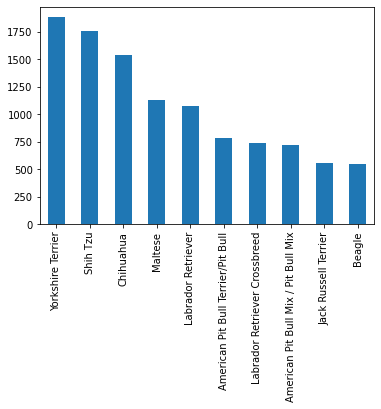

In [71]:
df['Primary Breed'].value_counts().head(10).plot.bar()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [72]:
# The Unknown breeds have been launched into the sun at import.

## What are the most popular dog names?

In [73]:
df['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [74]:
df[df['Animal Name'] == 'Ben']['Animal Name'].value_counts()

Ben    8
Name: Animal Name, dtype: int64

In [75]:
df[(df['Animal Name'] == 'Maxwell') | (df['Animal Name']== 'Max')]['Animal Name'].value_counts()


Max        202
Maxwell     11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

In [76]:
df['Guard or Trained'].value_counts(normalize=True) * 100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [77]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [78]:
df[df['Guard or Trained'].isna()]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,11216,unknown,F,American Pit Bull Terrier/Pit Bull,NaN,Black,White,NaN,2015-05-01,Yes,NaN,No,2015-08-22 18:12:19.780,2015-08-22,2016-08-22
29984,10021,KILO,M,German Shepherd Dog,NaN,Black,Cream,Tan,2007-02-01,Yes,NaN,Yes,2015-08-22 18:16:11.127,2015-08-22,2016-09-24
29989,10462,toby,M,Shih Tzu,NaN,Cream,Black,NaN,2006-03-01,No,NaN,Yes,2015-08-22 18:30:48.360,2015-08-22,2016-08-22
29994,10003,Beatrix Fox,F,Chihuahua,NaN,Fawn,Brown,White,2012-08-01,Yes,NaN,Yes,2015-08-22 18:52:08.887,2015-08-22,2016-08-22


## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [79]:
df['Guard or Trained'].fillna('No').value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [80]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [81]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [82]:
df['age'] = pd.datetime.now().year - df.year
df.age.mean()

/var/folders/m9/kw6252cj3lqgftmsg97nw4z80000gn/T/ipykernel_59676/451802698.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['age'] = pd.datetime.now().year - df.year


12.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [83]:
neighborhoods_df = pd.read_csv('zipcodes-neighborhoods.csv')
df = df.merge(neighborhoods_df, left_on='Owner Zip Code', right_on='zip')
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [84]:
df[df.borough == 'Bronx']['Animal Name'].value_counts().nlargest(1)

Bella    22
Name: Animal Name, dtype: int64

In [85]:
df[df.borough == 'Brooklyn']['Animal Name'].value_counts().nlargest(1)

Max    46
Name: Animal Name, dtype: int64

In [86]:
df[df.neighborhood == 'Upper East Side']['Animal Name'].value_counts().nlargest(1)

Charlie    19
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [87]:
df.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [88]:
df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).sort_values(ascending=False).tail(3) * 100


Primary Breed               Spayed or Neut
German Shepherd Crossbreed  No                3.361345
Greyhound                   No                1.785714
Bassett Hound               No                1.724138
Name: Spayed or Neut, dtype: float64

In [89]:
df.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).sort_values(ascending=False) * 100


Animal Gender  Spayed or Neut
               Yes               100.000000
F              Yes                85.756458
M              Yes                79.132335
               No                 20.867665
F              No                 14.243542
Name: Spayed or Neut, dtype: float64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [102]:
df['Animal Dominant Color'] = df['Animal Dominant Color'].str.upper()
df['Animal Secondary Color'] = df['Animal Secondary Color'].str.upper()
df['Animal Third Color'] = df['Animal Third Color'].str.upper()

monochromes = ['WHITE', 'BLACK', 'GREY']

for dog in df:
    df['monochrome'] = bool(df['Animal Dominant Color'] or df['Animal Secondary Color'] or df['Animal Third Color'].isin(monochromes))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

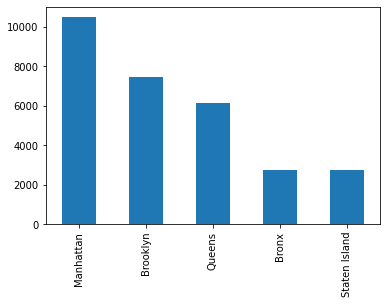

In [103]:
df.borough.value_counts().plot(kind='bar')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [104]:
boro_population = pd.read_csv('boro_population.csv')

# count total dogs / borough
dogs_per_borough = df.borough.value_counts().reset_index()
# col names
dogs_per_borough = dogs_per_borough.rename(
    columns={'index': 'borough', 'borough': 'n_dogs'})
# Merge
dogs_per_borough = dogs_per_borough.merge(
    boro_population, left_on='borough', right_on='borough')
# Calculate dogs/borough
dogs_per_borough['dogs_per_capita'] = dogs_per_borough.n_dogs / \
    dogs_per_borough.population

# Sortify
dogs_per_borough.sort_values('dogs_per_capita', ascending=False)

,borough,n_dogs,population,area_sqmi,dogs_per_capita
0,Manhattan,10478,1644518,23,0.006371
4,Staten Island,2727,474558,59,0.005746
1,Brooklyn,7466,2636735,71,0.002832
2,Queens,6154,2339150,109,0.002631
3,Bronx,2748,1455444,42,0.001888


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

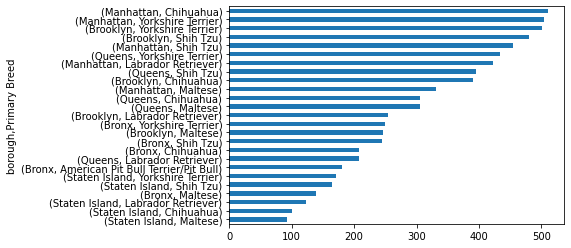

In [110]:
df.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).sort_values(ascending=False).plot.barh().invert_yaxis()
# God I hope this is right

In [ ]:
# My eyes hurt